In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

In [2]:
raw_data = pd.read_excel('../Area_weight_table.xlsx', sheet_name=8)
raw_data.shape

(34, 13)

In [3]:
raw_data = pd.read_excel('../Area_weight_table.xlsx', sheet_name=8)
raw_data.describe()

,Measured Plant Weight,Plant area(pixels)_image1,Plant area(cm2)_image1 (top view),Plant area(cm2)_image2 (front view),Predicted Plant Weight,Unnamed: 11
count,34.000000,34.000000,34.000000,34.0,0.0,0.0
mean,103.015882,136645.970588,537.813529,0.0,NaN,NaN
std,63.689515,91221.799797,248.376722,0.0,NaN,NaN
min,24.960000,49242.000000,192.750000,0.0,NaN,NaN
25%,46.680000,66793.500000,345.757500,0.0,NaN,NaN
50%,91.245000,71066.000000,476.860000,0.0,NaN,NaN
75%,143.097500,228172.000000,678.510000,0.0,NaN,NaN
max,277.640000,344126.000000,1306.290000,0.0,NaN,NaN


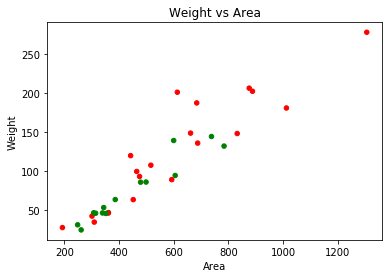

In [4]:
# plot raw data
raw_data.plot.scatter(x='Plant area(cm2)_image1 (top view)', y='Measured Plant Weight', c=raw_data.Cropped_by.map(dict(Gerry='green', Sushmita='red')))  
# uncomment to plot data for each reservoir
#raw_data.iloc[1:10].plot.scatter(x='Plant area(cm2)_image1 (top view)', y='Measured Plant Weight', c=raw_data.iloc[1:10].Cropped_by.map(dict(Gerry='green', Sushmita='red')))

plt.title('Weight vs Area')  
plt.xlabel('Area')  
plt.ylabel('Weight')  
plt.show()

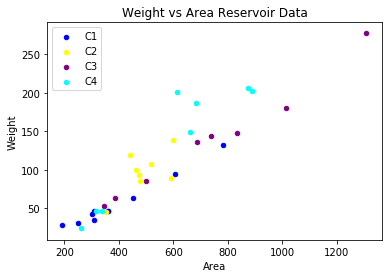

In [5]:
# color coding data for each reservoir
_, ax = plt.subplots()
colors = {'C1': 'blue','C2':'yellow', 'C3':'purple', 'C4':'cyan'}
for key,group in raw_data.groupby('Reservoir_ID'):
    group.plot.scatter(ax=ax, x='Plant area(cm2)_image1 (top view)', y='Measured Plant Weight', label=key, color = colors[key]);
#raw_data.plot.scatter(x='Plant area(cm2)_image1 (top view)', y='Measured Plant Weight', c=raw_data.Reservoir_ID.map(dict(C1='blue', C2='yellow', C3='purple', C4='cyan')))
plt.title('Weight vs Area Reservoir Data')

#plt.legend()
plt.xlabel('Area')
plt.ylabel('Weight')  
plt.show()

In [6]:
# divide variables into attributes(independent variables) and labels(dependent variables)
X = raw_data['Plant area(cm2)_image1 (top view)'].values.reshape(-1,1)
Y = raw_data['Measured Plant Weight'].values.reshape(-1,1)
# split data into training and testing (validating) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
# fit the model and train
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predict data
Y_pred = regressor.predict(X_test)
# Compare predicted values with actual values
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
print(df)

   Actual   Predicted
0   86.00   87.058056
1   63.77   64.291215
2  277.64  290.304302
3  119.88   78.103590
4   27.93   16.822229
5  148.72  131.967922
6   46.64   52.831660


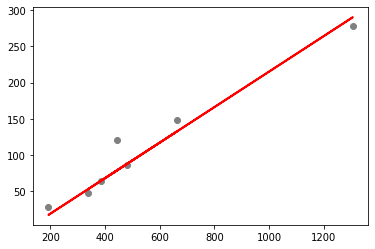

In [9]:
# Plot predicted test data
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [10]:
# Metrics for model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(mean_squared_log_error( Y_test, Y_pred )))
print('R^2 score:',metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 12.867356054786006
Mean Squared Error: 335.627924076105
Root Mean Squared Error: 18.320150765648872
Root Mean Squared Log Error: 0.25232660841334303
R^2 score: 0.9455694306517867
